Medical Diagnostics Data Analysis Project
  GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC_DISEASE  \
0      M   65     Yes            Yes     Yes            No              No   
1      F   55     Yes             No      No           Yes             Yes   
2      F   78      No             No     Yes           Yes             Yes   
3      M   60      No            Yes     Yes           Yes              No   
4      F   80     Yes            Yes      No           Yes             Yes   

  FATIGUE ALLERGY WHEEZING ALCOHOL_CONSUMING COUGHING SHORTNESS_OF_BREATH  \
0     Yes      No       No                No       No                  No   
1      No      No       No               Yes      Yes                 Yes   
2      No     Yes       No               Yes      Yes                  No   
3     Yes      No      Yes               Yes       No                 Yes   
4      No     Yes       No               Yes      Yes                 Yes   

  SWALLOWING_DIFFICULTY CH

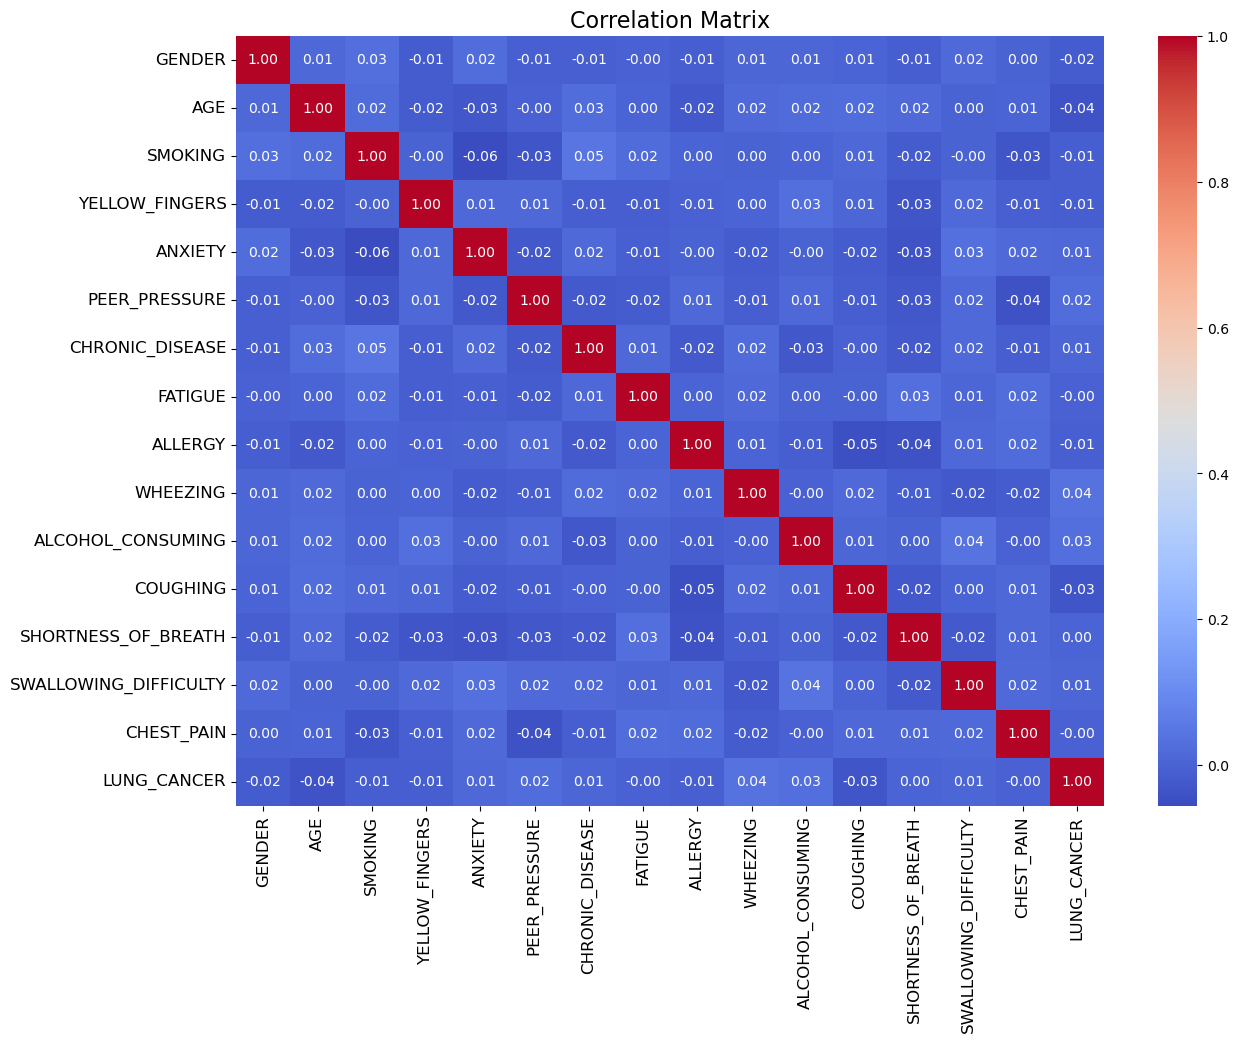

Logistic Regression:
Best Parameters: {'C': 1}
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       302
           1       0.52      0.57      0.54       298

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600

Accuracy: 0.5216666666666666
Cross-Validation Scores: [0.48541667 0.5125     0.49583333 0.5375     0.53958333]
Mean Cross-Validation Score: 0.5141666666666667
Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       302
           1       0.51      0.52      0.51       298

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600

Accuracy: 0.51
Cross-Validation Scores: [0.475      0.51875    0.51

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Introduction
print("Medical Diagnostics Data Analysis Project")

# Step 2: Loading the Data
df = pd.read_csv('C:/Users/KIIT/Desktop/Lung cancer/dataseter.csv')

# Display the first few rows
print(df.head())

# Step 3: Exploratory Data Analysis (EDA)
# Summary Statistics
print(df.describe(include='all'))

# Handling Missing Values
missing_values = df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

# Encoding Categorical Variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Plotting the correlation matrix heatmap
# Visualizations
plt.figure(figsize=(14, 10))  # Increase the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})  # Adjust the font size
plt.title('Correlation Matrix', fontsize=16)  # Increase the title font size
plt.xticks(fontsize=12)  # Adjust the x-axis font size
plt.yticks(fontsize=12)  # Adjust the y-axis font size
plt.show()

# Step 4: Data Preprocessing
# Handling Outliers - Example using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('LUNG_CANCER', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['LUNG_CANCER'] = df['LUNG_CANCER'].values

# Step 5: Feature Engineering (if applicable)
# Example: Combining related features or creating new ones
# df['NEW_FEATURE'] = df['FEATURE1'] + df['FEATURE2']

# Step 6: Model Building
# Train-Test Split
X = df_scaled.drop('LUNG_CANCER', axis=1)
y = df_scaled['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Hyperparameter Tuning - Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_params = {'C': [0.1, 1, 10, 100]}
logreg_cv = GridSearchCV(logreg, logreg_params, cv=5)
logreg_cv.fit(X_train, y_train)

# Model Training and Hyperparameter Tuning - Random Forest
rf = RandomForestClassifier()
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
rf_cv = GridSearchCV(rf, rf_params, cv=5)
rf_cv.fit(X_train, y_train)

# Cross-Validation Scores
logreg_cv_scores = cross_val_score(logreg_cv.best_estimator_, X_train, y_train, cv=5)
rf_cv_scores = cross_val_score(rf_cv.best_estimator_, X_train, y_train, cv=5)

# Model Evaluation - Logistic Regression
y_pred_logreg = logreg_cv.predict(X_test)
print("Logistic Regression:")
print(f"Best Parameters: {logreg_cv.best_params_}")
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Cross-Validation Scores: {logreg_cv_scores}")
print(f"Mean Cross-Validation Score: {logreg_cv_scores.mean()}")

# Model Evaluation - Random Forest
y_pred_rf = rf_cv.predict(X_test)
print("Random Forest:")
print(f"Best Parameters: {rf_cv.best_params_}")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean Cross-Validation Score: {rf_cv_scores.mean()}")

# Step 7: Conclusion
print("Summary of findings and conclusions.")
